# 🚗 Predicting Car Prices Based on Features (Linear Regression Example)

## 🎯 Real-World Scenario

You're working at a used car dealership. Customers want to know whether the prices of used cars are fair. To automate pricing estimates, you decide to build a **Linear Regression** model that predicts the price of a used car based on factors like:

- **Age of the car**
- **Mileage**
- **Brand**
- **Engine size**
- **Fuel type**



## 📁 Dataset

We'll use an open-source dataset:

📎 [Car Price Dataset on GitHub](https://github.com/selva86/datasets/blob/master/Cars93_miss.csv)
---


## ❓ Problem Statement

**Goal:** Predict the price of a car using features such as:

- Mileage
- Year
- Brand
- Engine size
- Fuel type

## 📊 What You'll Learn

- How to load and explore a real-world dataset
- How to preprocess data for machine learning
- How to build and evaluate a linear regression model
- How to interpret model results to make business decisions

Let's get started! 🚀


## Import Libraries
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


## Load Dataset

In [ ]:
# Load the car dataset from a public GitHub URL
# The dataset contains information about various cars, including mpg, cylinders, engine size, horsepower, weight, acceleration time, year, and continent of origin.

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df = pd.read_csv(url)
df.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


##  Understand the Dataset 


In [ ]:
# Display concise summary of the DataFrame, including column types and non-null counts
df.info()

# Show descriptive statistics for numerical columns (mean, std, min, max, etc.)
df.describe()

# Display the number of missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   continent    261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
continent      0
dtype: int64

### Understanding the Dataset (`df`)

- **Rows:** 261 cars  
- **Columns:** 8 features per car

| Column        | Description                              | Type      | Example Value |
|---------------|------------------------------------------|-----------|---------------|
| mpg           | Miles per gallon (fuel efficiency)        | float64   | 14.0          |
| cylinders     | Number of engine cylinders                | int64     | 8             |
| cubicinches   | Engine size in cubic inches               | int64     | 350           |
| hp            | Horsepower                               | int64     | 165           |
| weightlbs     | Weight of the car in pounds               | int64     | 4209          |
| time-to-60    | Seconds to accelerate 0–60 mph            | int64     | 12            |
| year          | Model year                               | int64     | 1972          |
| continent     | Origin of the car (US, Europe, Japan)     | object    | US.           |

- **No missing values:** All columns are complete.
- **Data types:** Most features are numeric, except `continent` (categorical).
- **Usage:** This dataset is suitable for regression tasks, such as predicting car price or fuel efficiency based on these features.

##  EDA (Visualizations)

Exploratory Data Analysis (EDA) helps us understand the dataset’s structure, spot patterns, and detect anomalies. Here, we’ll visualize relationships between features (like mileage, horsepower, and weight), check correlations, and look for trends that might influence car prices. This step guides feature selection and model building.

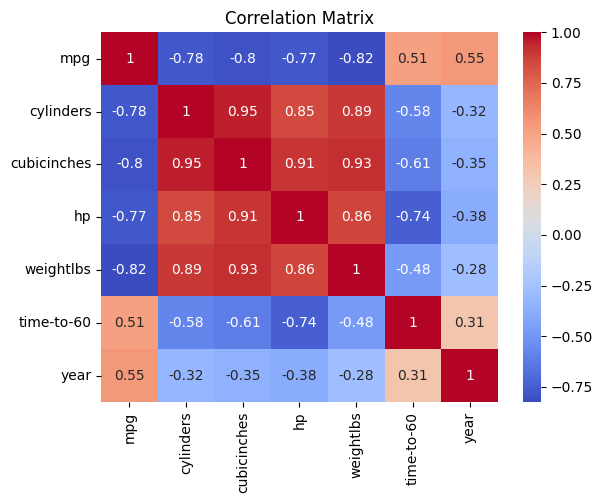

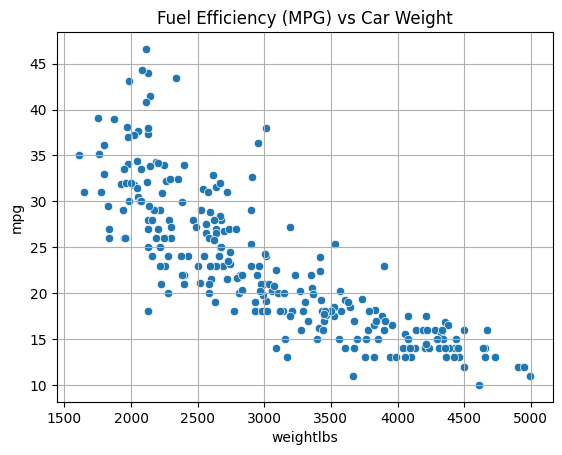

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Now plot MPG vs Weight (realistic use case)
sns.scatterplot(data=df, x='weightlbs', y='mpg')
plt.title("Fuel Efficiency (MPG) vs Car Weight")
plt.grid(True)
plt.show()


### Correlation Matrix & Scatter Plot Explanation

#### 🔷 Correlation Matrix (Heatmap)
- **What it shows:** The heatmap visualizes the correlation coefficients between all pairs of numerical features in the dataset.
- **How to read:** 
    - Values close to **1** (red) indicate a strong positive relationship (as one feature increases, so does the other).
    - Values close to **-1** (blue) indicate a strong negative relationship (as one increases, the other decreases).
    - Values near **0** mean little or no linear relationship.
- **Insights:** For example, `weightlbs` and `mpg` have a strong negative correlation, meaning heavier cars tend to have lower fuel efficiency.

#### 🔷 Scatter Plot: MPG vs Weight
- **What it shows:** Each point represents a car, plotting its weight (`weightlbs`) against its fuel efficiency (`mpg`).
- **How to read:** 
    - The downward trend shows that as car weight increases, fuel efficiency (mpg) decreases.
- **Business insight:** Lighter cars are generally more fuel-efficient, which is important for pricing and marketing.

---

These visualizations help identify which features are most relevant for predicting car prices or fuel efficiency, guiding feature selection for the regression model.

## Define Features and Target

In [18]:
X = df[['cubicinches', 'hp', 'weightlbs', 'time-to-60', 'cylinders', 'year']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Linear Regression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predict and Evaluate

After training the linear regression model, we use it to predict the MPG (fuel efficiency) for the test set. We then evaluate the model's performance using metrics such as **Mean Squared Error (MSE)** and **R² Score**:

- **Prediction:** The model generates predicted MPG values (`y_pred`) for the cars in the test set (`X_test`).
- **Evaluation:**  
    - **MSE** quantifies the average squared difference between actual (`y_test`) and predicted (`y_pred`) MPG values. Lower values indicate better predictions.
    - **R² Score** measures how well the model explains the variance in the target variable. Values closer to 1 mean better fit.

These metrics help us understand how accurately the model can estimate fuel efficiency for unseen cars, guiding further improvements or business decisions.

In [20]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 12.21079601651563
R² Score: 0.8042965925572019


### Model Evaluation Results Explained

- **Mean Squared Error (MSE):**  
    This value measures the average squared difference between the actual and predicted MPG values. A lower MSE indicates better model performance. It penalizes larger errors more heavily.

- **R² Score (Coefficient of Determination):**  
    This value (between 0 and 1) shows how well the model explains the variance in the target variable (MPG).  
    - **R² ≈ 1:** Model predicts perfectly.  
    - **R² ≈ 0:** Model does no better than predicting the mean.

#### What the Results Mean

- If the **MSE** is low and the **R² score** is close to 1, the model predicts car fuel efficiency (MPG) accurately based on the input features.
- If the **R² score** is low or negative, the model does not capture the relationship well, and predictions may not be reliable.

#### Business Interpretation

- **High R² and low MSE:**  
    The model can be trusted to estimate MPG for new cars, helping set fair prices and guide customer decisions.
- **Low R² or high MSE:**  
    The model may need improvement (e.g., more features, better preprocessing) before using it for business decisions.

---

**Next Step:**  
Visualize predicted vs. actual MPG to see how close the predictions are for each car in the test set.

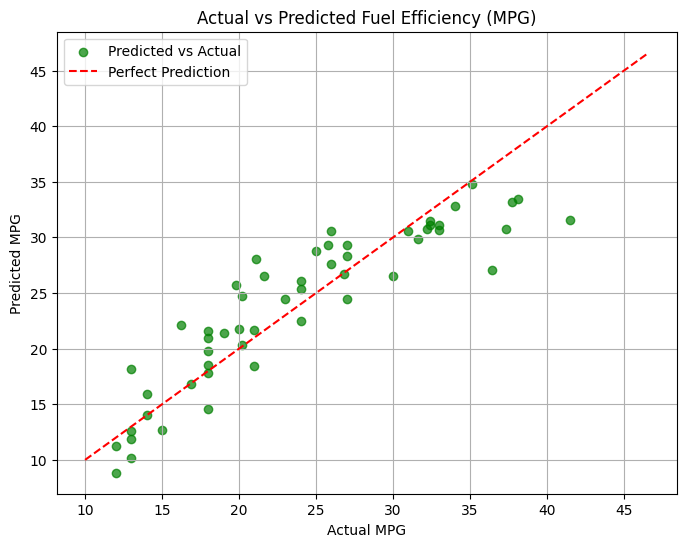

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted Fuel Efficiency (MPG)")
plt.legend()
plt.grid(True)
plt.show()


## Summary of Features

| Feature       | Meaning                              |
|---------------|--------------------------------------|
| cubicinches   | Engine displacement size             |
| hp            | Horsepower                          |
| weightlbs     | Weight of the car                   |
| time-to-60    | Time to accelerate to 60 mph        |
| cylinders     | Number of engine cylinders          |
| year          | Manufacturing year                  |
| mpg           | Target: fuel efficiency (miles per gallon) |

In [28]:
# Randomly select 4 samples from the test set
sample_indices = np.random.choice(y_test.index, size=4, replace=False)

for idx in sample_indices:
    sample = X_test.loc[[idx]]
    print(f"Test sample features (index {idx}):")
    print(sample)
    predicted = model.predict(sample[numeric_features])[0]
    actual = y_test.loc[idx]
    print(f"Predicted MPG: {predicted:.2f}")
    print(f"Actual MPG: {actual}\n")


Test sample features (index 178):
     cubicinches   hp  weightlbs  time-to-60  cylinders  year continent
178          302  139       3570          13          8  1979       US.
Predicted MPG: 20.36
Actual MPG: 20.2

Test sample features (index 113):
     cubicinches  hp  weightlbs  time-to-60  cylinders  year continent
113           91  53       1795          18          4  1976    Japan.
Predicted MPG: 30.64
Actual MPG: 33.0

Test sample features (index 140):
     cubicinches   hp  weightlbs  time-to-60  cylinders  year continent
140          173  115       2700          13          6  1980       US.
Predicted MPG: 26.67
Actual MPG: 26.8

Test sample features (index 132):
     cubicinches   hp  weightlbs  time-to-60  cylinders  year continent
132          455  225       4951          11          8  1974       US.
Predicted MPG: 8.85
Actual MPG: 12.0



### 🚀 How to Improve the Linear Regression Model

1. **Feature Engineering**
    - Add new features (e.g., interaction terms, polynomial features) to capture non-linear relationships.
    - Encode categorical variables (like `continent`) using one-hot encoding for richer information.

2. **Data Preprocessing**
    - Scale or normalize features to ensure all variables contribute equally.
    - Detect and remove outliers that may skew the model.

3. **Model Selection**
    - Try more advanced models (e.g., Ridge, Lasso, or tree-based regressors) to capture complex patterns.
    - Use cross-validation to select the best model and tune hyperparameters.

4. **Feature Selection**
    - Remove irrelevant or highly correlated features to reduce overfitting and improve interpretability.

5. **Increase Data Quality**
    - Gather more data if possible, or use data augmentation techniques.
    - Handle missing values more robustly if they exist in other datasets.

6. **Residual Analysis**
    - Analyze prediction errors to identify systematic patterns the model is missing.

---

**Summary:**  
Improving the model involves better feature engineering, preprocessing, trying advanced algorithms, and careful evaluation. These steps can lead to more accurate and reliable predictions for car fuel efficiency or price.

# 🎉 Congratulations! You Completed Your First Regression Model

You’ve successfully built, trained, and evaluated a linear regression model to predict car fuel efficiency (MPG) based on real-world features. Here’s what you accomplished:

- **Explored and visualized the dataset**
- **Selected relevant features for modeling**
- **Trained a linear regression model**
- **Evaluated model performance using MSE and R²**
- **Visualized predictions vs. actual values**

This workflow forms the foundation for more advanced machine learning projects. Keep experimenting with feature engineering, preprocessing, and different algorithms to further improve your models. 🚗💡

---

**Next steps:**  
- Try adding categorical features (like `continent`) using encoding techniques  
- Experiment with polynomial features or regularization  
- Explore other regression algorithms (Ridge, Lasso, tree-based models)

Great job! 🚀